# Understanding the data

In [1]:
# importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import joblib
import pickle
from datetime import datetime
from statistics import mode
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import RocCurveDisplay, accuracy_score, confusion_matrix

In [3]:
hits = pd.read_csv('data/ga_hits.csv')

In [4]:
sessions = pd.read_csv('data/ga_sessions.csv')

C:\Users\quran\AppData\Local\Temp\ipykernel_8292\700687483.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  sessions = pd.read_csv('data/ga_sessions.csv')


In [5]:
sessions.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [7]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB


In [119]:
# just understanding the data
def top_10_values_hist(dataframe, column_name):
    top_10_values = dataframe[column_name].value_counts(dropna = False).nlargest(10)
    
    plt.figure(figsize=(10, 4))
    top_10_values.plot(kind='bar')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Top 10 Most Frequent Values in {column_name}')
    plt.xticks(rotation=45)
    plt.show()

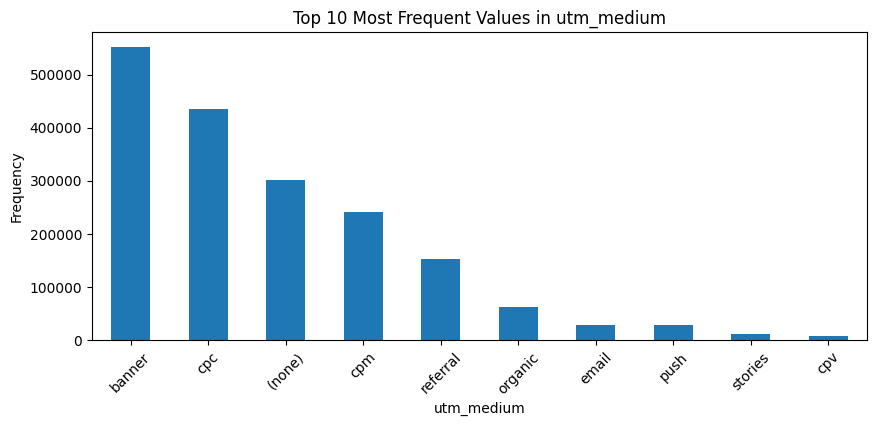

In [21]:
top_10_values_hist(sessions, 'utm_medium')

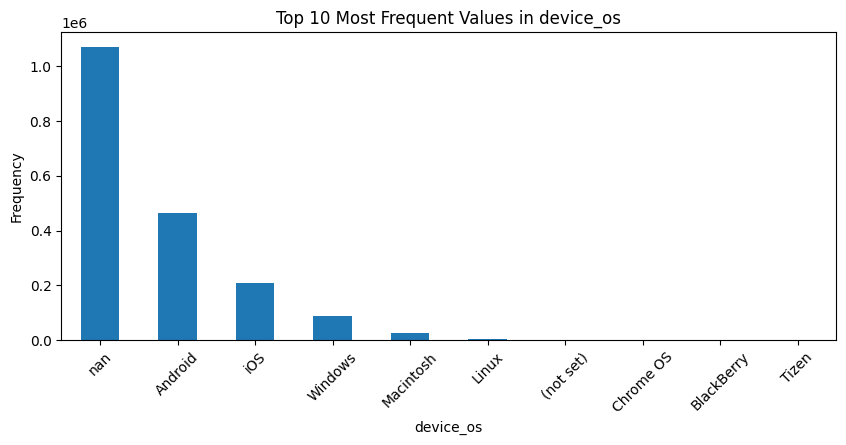

In [23]:
top_10_values_hist(sessions, 'device_os')

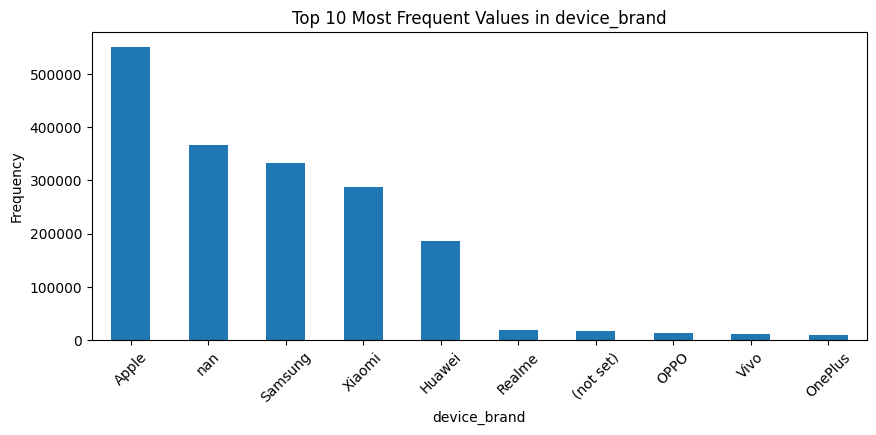

In [22]:
top_10_values_hist(sessions, 'device_brand')

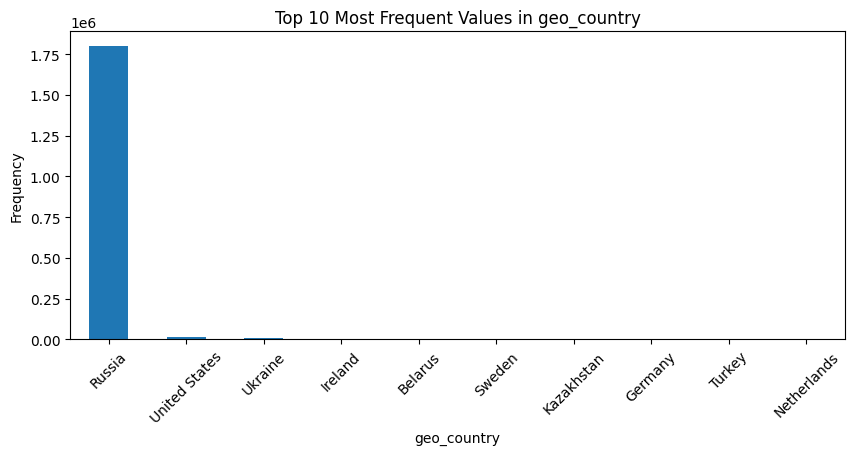

In [24]:
top_10_values_hist(sessions, 'geo_country')

In [25]:
hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [26]:
hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ GB


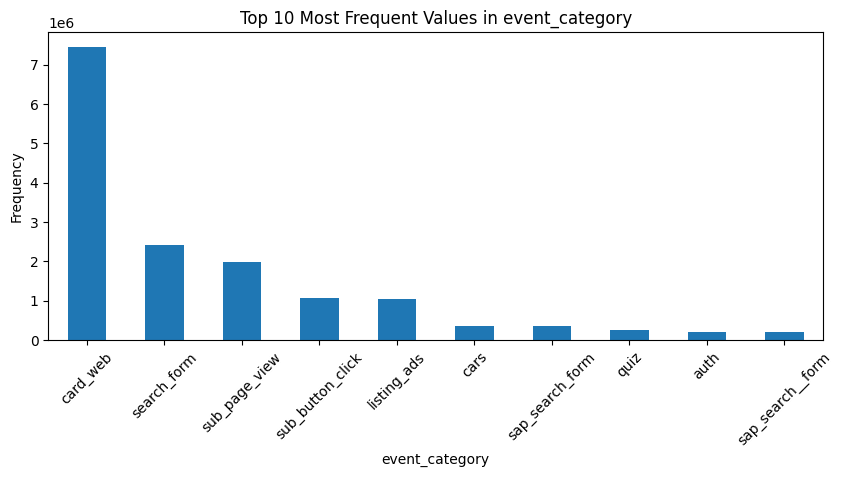

In [29]:
top_10_values_hist(hits, 'event_category')

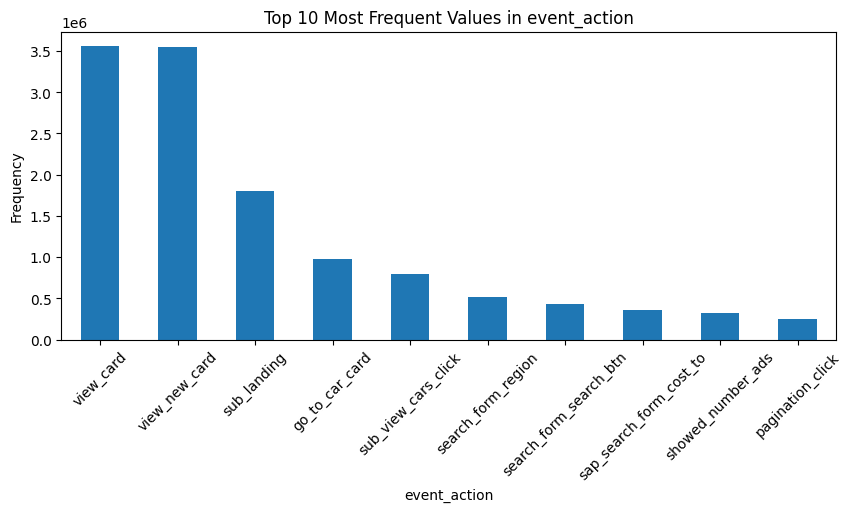

In [30]:
top_10_values_hist(hits, 'event_action')

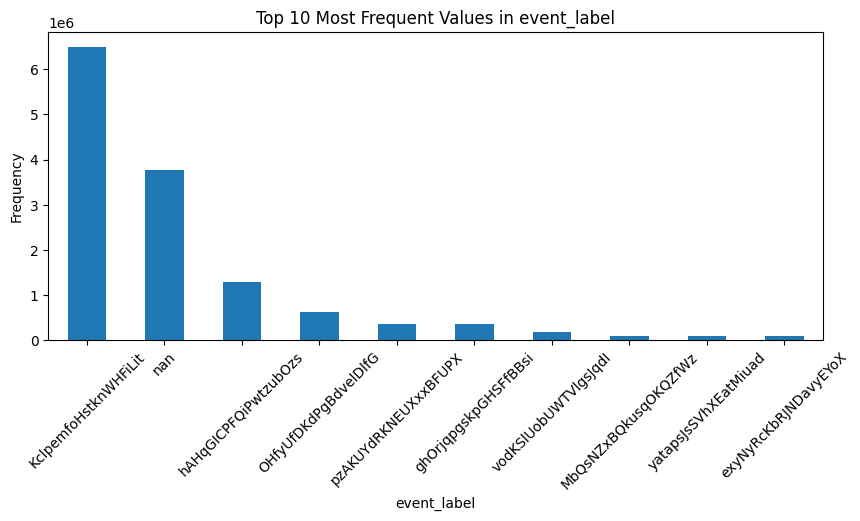

In [31]:
top_10_values_hist(hits, 'event_label')

In [32]:
hits.event_value.value_counts(dropna=False)

event_value
NaN    15726470
Name: count, dtype: int64

In [33]:
hits.event_action.value_counts(dropna=False)

event_action
view_card                     3558985
view_new_card                 3551009
sub_landing                   1798117
go_to_car_card                 973666
sub_view_cars_click            791515
                               ...   
click_on_android                    1
new_year_road_help_btn              1
titul_page_view                     1
show_pos_status_declined            1
survey_buy_after_sell_when          1
Name: count, Length: 230, dtype: int64

In [6]:
# targent function from documentation
list = ['sub_car_claim_click', 'sub_car_claim_submit_click',
'sub_open_dialog_click', 'sub_custom_question_submit_click',
'sub_call_number_click', 'sub_callback_submit_click', 'sub_submit_success',
'sub_car_request_submit_click']

# apply
hits['target'] = hits['event_action'].apply(lambda x: 1 if x in list else 0)

In [35]:
hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     float64
 11  target          int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 1.4+ GB


In [7]:
target_df = hits.groupby(['session_id'])['target'].sum().reset_index()

In [8]:
target_df

,session_id,target
0,1000009318903347362.1632663668.1632663668,0
1,1000010177899156286.1635013443.1635013443,0
2,1000013386240115915.1635402956.1635402956,0
3,1000017303238376207.1623489300.1623489300,0
4,1000020580299877109.1624943350.1624943350,0
...,...,...
1734605,999960188766601545.1626816843.1626816843,0
1734606,99996598443387715.1626811203.1626811203,0
1734607,999966717128502952.1638428330.1638428330,0
1734608,999988617151873171.1623556243.1623556243,0


In [9]:
# Out of 15726470 hits, we had 1734610 sessions in the site (avarage 9 hits per session)

In [10]:
sessions.groupby(['client_id'])['session_id'].sum().reset_index().shape

(1391717, 2)

In [11]:
# 1734610 sessions were done by 1391717 clients. interesting:)

In [12]:
target_df['target'] = target_df["target"].apply(lambda x: 1 if x >0 else 0)
target_df

,session_id,target
0,1000009318903347362.1632663668.1632663668,0
1,1000010177899156286.1635013443.1635013443,0
2,1000013386240115915.1635402956.1635402956,0
3,1000017303238376207.1623489300.1623489300,0
4,1000020580299877109.1624943350.1624943350,0
...,...,...
1734605,999960188766601545.1626816843.1626816843,0
1734606,99996598443387715.1626811203.1626811203,0
1734607,999966717128502952.1638428330.1638428330,0
1734608,999988617151873171.1623556243.1623556243,0


In [13]:
sessions_df = sessions.merge(target_df, on=['session_id'], how='left')
sessions_df

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target
0,9055434745589932991.1637753792.1637753792,2108382700.163776,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust,0.0
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,0.0
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk,0.0
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0.0
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1860037,9055415581448263752.1640159305.1640159305,2108378238.164016,2021-12-22,10:48:25,1,BHcvLfOaCWvWTykYqHVe,cpc,NaN,NaN,VlqBmecIOXWjCWUmQkLd,desktop,Windows,NaN,NaN,1920x1080,Chrome,Russia,Moscow,0.0
1860038,9055421130527858185.1622007305.1622007305,2108379530.162201,2021-05-26,08:00:00,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,NaN,mobile,NaN,Apple,NaN,390x844,Safari,Russia,Stavropol,0.0
1860039,9055422955903931195.1636979515.1636979515,2108379955.163697,2021-11-15,15:31:55,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,iOS,Apple,NaN,375x667,Safari,Russia,Moscow,0.0
1860040,905543020766873816.1638189404.1638189404,210838164.163819,2021-11-29,15:36:44,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,mobile,Android,Xiaomi,NaN,393x851,Chrome,Russia,Chelyabinsk,0.0


In [14]:
sessions_df.target.value_counts(dropna=False)

target
0.0    1681952
NaN     127776
1.0      50314
Name: count, dtype: int64

In [15]:
#127776 sessions with no hits at all; So we just count them as 0
sessions_df['target'].fillna(0, inplace=True)

In [16]:
sessions_df.target.value_counts(dropna=False)

target
0.0    1809728
1.0      50314
Name: count, dtype: int64

In [22]:
# I am saving it because I am turning off my notebook now; Next time I can start wokr by importing the dataset
sessions_df.to_csv('data/sessions_full.csv', index=False)

In [23]:
# Starting after the interval
sessions_full = pd.read_csv('data/sessions_full.csv', low_memory=False)

In [24]:
sessions_full.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target
0,9055434745589932991.1637753792.1637753792,2108382700.1637757,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust,0.0
1,905544597018549464.1636867290.1636867290,210838531.16368672,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,0.0
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk,0.0
3,9055447046360770272.1622255328.1622255328,2108385564.1622252,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0.0
4,9055447046360770272.1622255345.1622255345,2108385564.1622252,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0.0


In [25]:
sessions_full.columns

Index(['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number',
       'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
       'utm_keyword', 'device_category', 'device_os', 'device_brand',
       'device_model', 'device_screen_resolution', 'device_browser',
       'geo_country', 'geo_city', 'target'],
      dtype='object')

In [ ]:
sessions_full.head()

In [18]:
# getting testing sample from the data
just1 = sessions_full[sessions_full.target == 0].dropna().sample(n=100, random_state=1)
just2 = sessions_full[sessions_full.target == 0].dropna().sample(n=100, random_state=1)

test = pd.concat([just1, just2]).drop(columns='target')
test.to_csv('data/df_test.csv', index=False)

## Feature engineering

In [17]:
models = hits.groupby(['session_id','hit_page_path'])['target'].sum().reset_index()
models.head()

,session_id,hit_page_path,target
0,1000009318903347362.1632663668.1632663668,podpiska.sberauto.com/,0
1,1000009318903347362.1632663668.1632663668,podpiska.sberauto.com/faq?utm_source_initial=y...,0
2,1000009318903347362.1632663668.1632663668,sberauto.com/cars/2fc745ed?utm_source_initial=...,0
3,1000010177899156286.1635013443.1635013443,podpiska.sberauto.com/,0
4,1000010177899156286.1635013443.1635013443,sberauto.com/cars?city=1&city=18&rental_page=r...,0


In [18]:
models.hit_page_path.to_list()

['podpiska.sberauto.com/',
 'podpiska.sberauto.com/faq?utm_source_initial=youtube&utm_medium_initial=cpm&utm_campaign_initial=FTjNLDyTrXaWYgZymFkV&utm_content_initial=PkybGvWbaqORmxjNunqZ&utm_term_initial=id15_430s_keyword',
 'sberauto.com/cars/2fc745ed?utm_source_initial=youtube&utm_medium_initial=cpm&utm_campaign_initial=FTjNLDyTrXaWYgZymFkV&utm_content_initial=PkybGvWbaqORmxjNunqZ&utm_term_initial=WxlboVseFpLmzsoVKkkQ&rental_page=rental_car',
 'podpiska.sberauto.com/',
 'sberauto.com/cars?city=1&city=18&rental_page=rental_only&rental_car=rental_only&page=1',
 'podpiska.sberauto.com/',
 'sberauto.com/cars/all/lada-vaz/vesta/2fc745ed?utm_source_initial=sbol&utm_medium_initial=banner&utm_campaign_initial=gecBYcKZCPMcVYdSSzKP&rental_page=rental_car',
 'sberauto.com/cars?utm_source_initial=sbol&utm_medium_initial=banner&utm_campaign_initial=gecBYcKZCPMcVYdSSzKP&city=1&city=18&rental_page=rental_only&rental_car=rental_only&page=1',
 'podpiska.sberauto.com/',
 'sberauto.com/cars/94b3d18e?r

In [19]:
models['brend'] = models["hit_page_path"].apply(lambda x: x.split('/')[3]  if 'sberauto.com/cars/all/' in x else '*')
models['model'] = models["hit_page_path"].apply(lambda x: x.split('/')[4]  if 'sberauto.com/cars/all/' in x else '*')

models=models[models['brend'] !='*']
models.head()

,session_id,hit_page_path,target,brend,model
6,1000013386240115915.1635402956.1635402956,sberauto.com/cars/all/lada-vaz/vesta/2fc745ed?...,0,lada-vaz,vesta
18,1000043953525145011.1638186424.1638186424,sberauto.com/cars/all/skoda/rapid/bf24b977?ren...,0,skoda,rapid
19,1000043953525145011.1638186424.1638186424,sberauto.com/cars/all/volkswagen/polo/e994838f...,0,volkswagen,polo
22,1000043953525145011.1638786530.1638786530,sberauto.com/cars/all/renault/duster/145d53f1?...,0,renault,duster
23,1000043953525145011.1638786530.1638786530,sberauto.com/cars/all/skoda/rapid/bf24b977?utm...,0,skoda,rapid


In [20]:
model_freq = models.groupby(['model'])['target'].sum().reset_index()
model_freq.sort_values(by='target', ascending=False)

,model,target
43,rapid,5861
60,vesta,5219
38,polo,4454
45,rio,1408
29,karoq,1298
...,...,...
42,range-rover-velar,0
54,taos,0
28,k5,0
37,passat,0


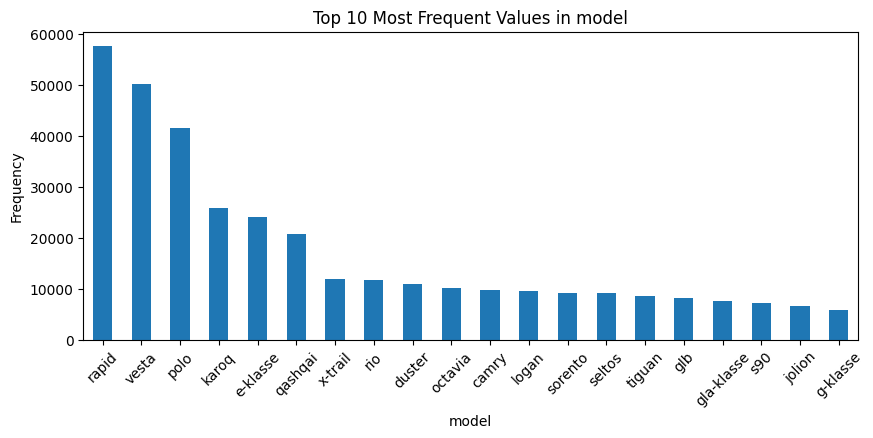

In [50]:
top_10_values_hist(models, 'model')

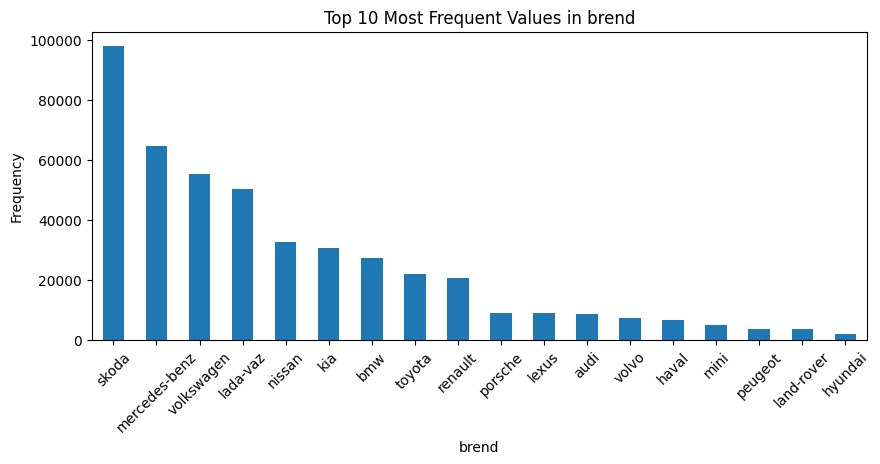

In [51]:
top_10_values_hist(models, 'brend')

## Data preparation

In [57]:
sessions_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 19 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   session_id                object 
 1   client_id                 object 
 2   visit_date                object 
 3   visit_time                object 
 4   visit_number              int64  
 5   utm_source                object 
 6   utm_medium                object 
 7   utm_campaign              object 
 8   utm_adcontent             object 
 9   utm_keyword               object 
 10  device_category           object 
 11  device_os                 object 
 12  device_brand              object 
 13  device_model              object 
 14  device_screen_resolution  object 
 15  device_browser            object 
 16  geo_country               object 
 17  geo_city                  object 
 18  target                    float64
dtypes: float64(1), int64(1), object(17)
memory usage: 269.6+ MB


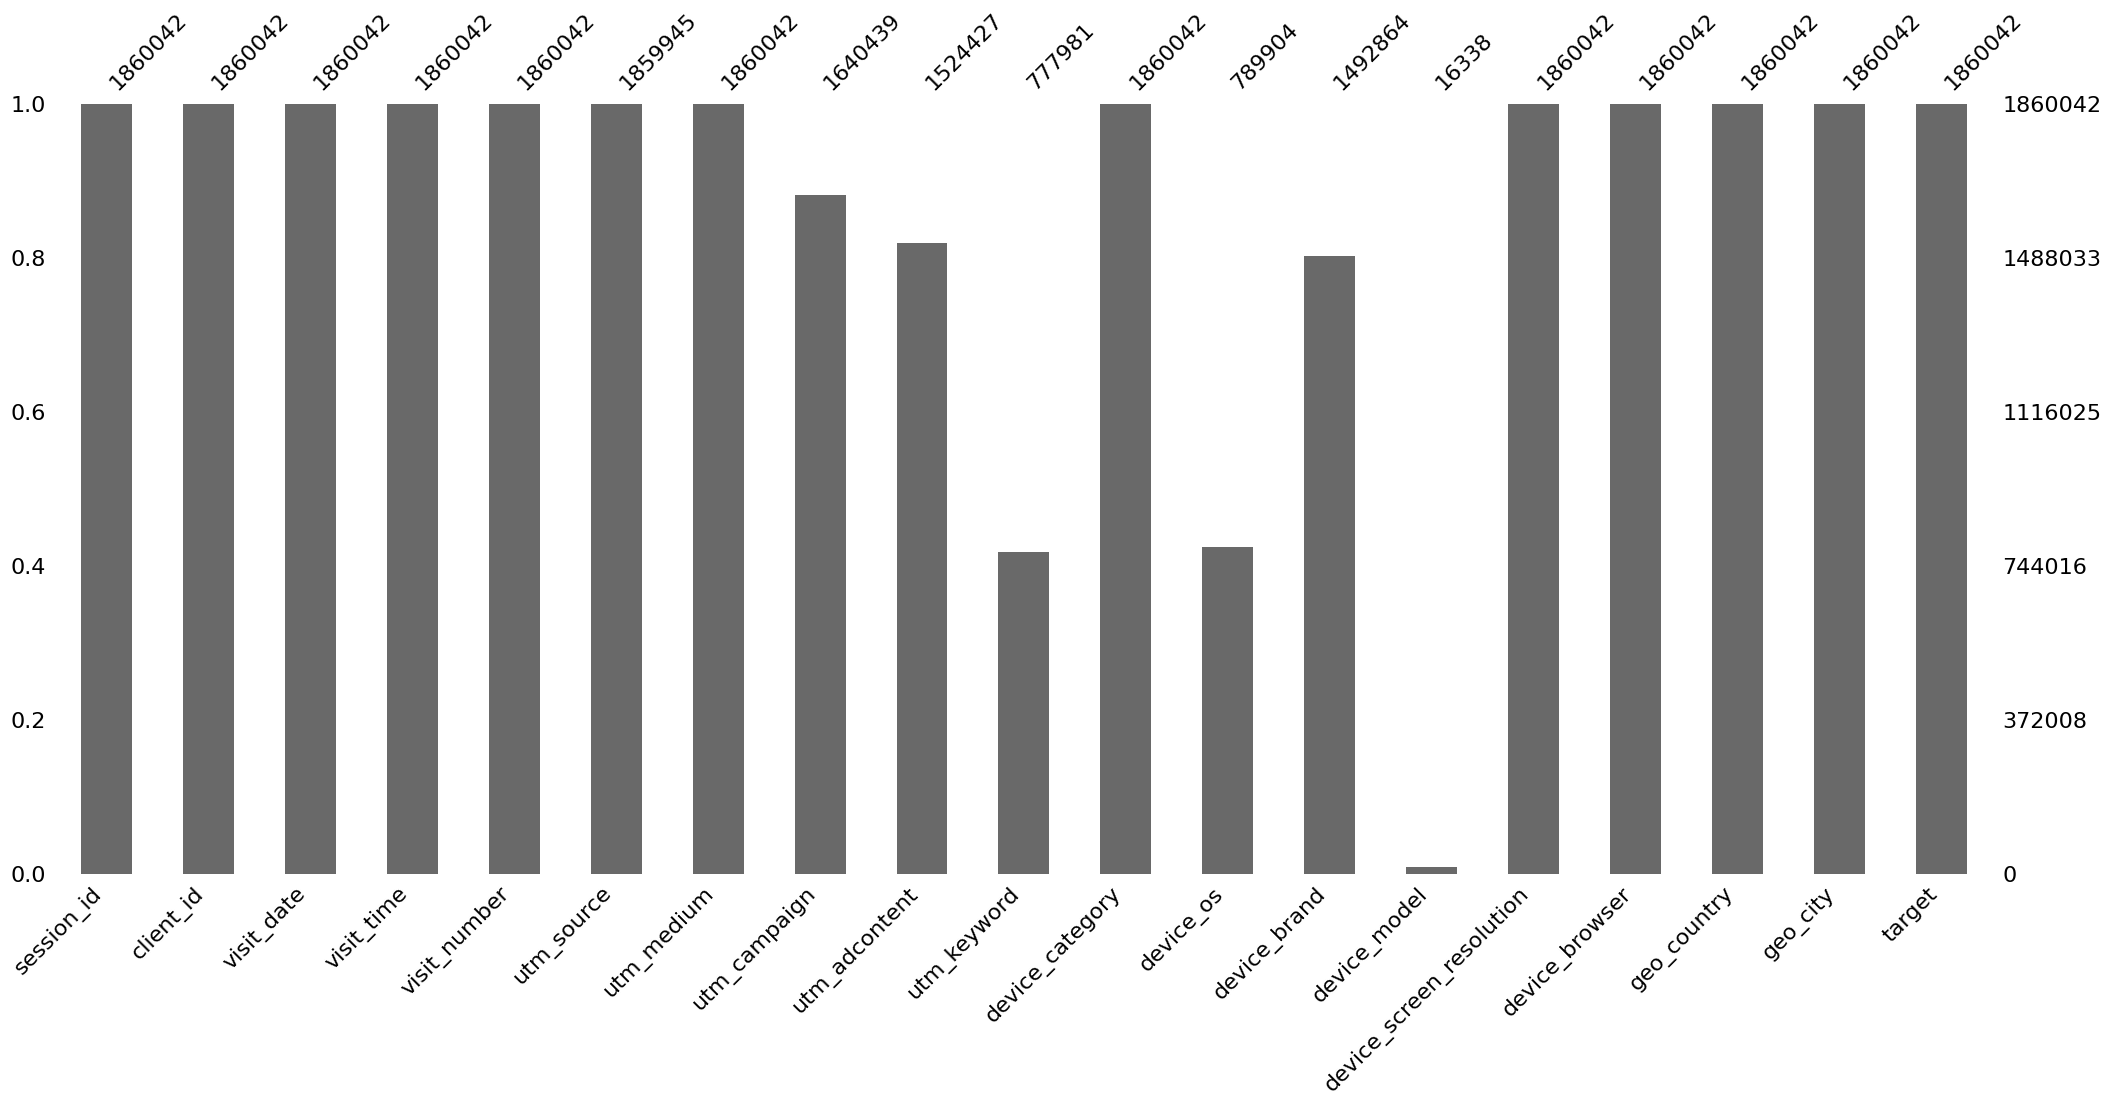

In [63]:
msno.bar(sessions_full);

C:\Users\quran\AppData\Local\Temp\ipykernel_17020\250608599.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ax.hist(pd.to_datetime(sessions_full[sessions_full['target'] == 1]['visit_time']).apply(lambda x: x.hour), bins=24, color='b', rwidth=0.9)


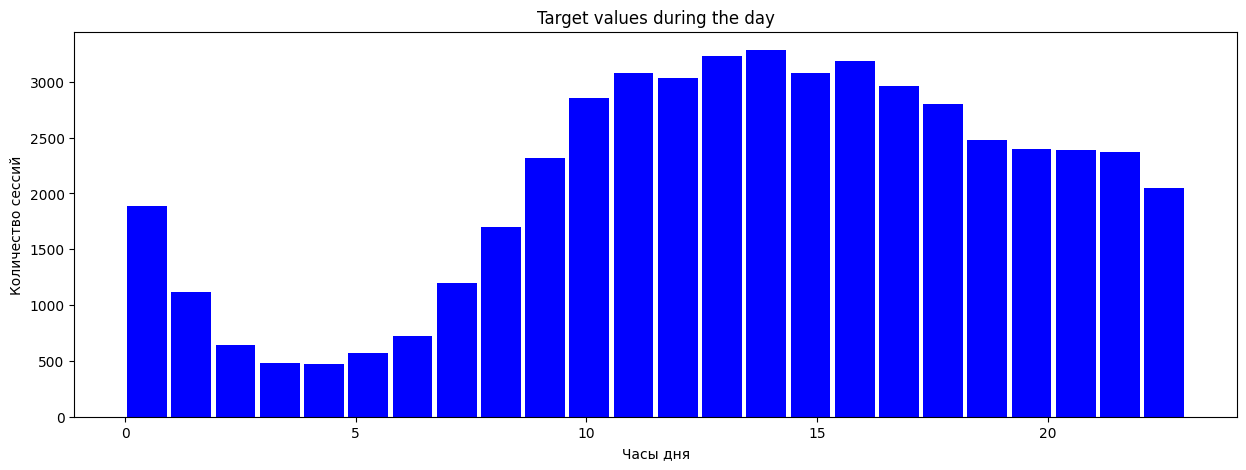

In [71]:
# 
fig, ax = plt.subplots(figsize=(15, 5))

ax.hist(pd.to_datetime(sessions_full[sessions_full['target'] == 1]['visit_time']).apply(lambda x: x.hour), bins=24, color='b', rwidth=0.9)
ax.set_title('Target values during the day')
ax.set_xlabel('Часы дня')
ax.set_ylabel('Количество сессий');

In [27]:
# По условия задач у нас основная характеристика поля тип utm_*,device_*,geo_*
# поэтому удалим лишние поля
sessions_full = sessions_full.drop(columns=['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number'])
sessions_full.head()

,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city,target
0,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust,0.0
1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow,0.0
2,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk,0.0
3,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0.0
4,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow,0.0


### Fixing the data types

In [28]:
for x in sessions_full.drop(columns=['target']).columns.to_list():
    sessions_full[x] = sessions_full[x].dropna().astype('str')

### Fixing missing values

In [29]:
sessions_full.isna().sum().sort_values(ascending=False)

device_model                1843704
utm_keyword                 1082061
device_os                   1070138
device_brand                 367178
utm_adcontent                335615
utm_campaign                 219603
utm_source                       97
utm_medium                        0
device_category                   0
device_screen_resolution          0
device_browser                    0
geo_country                       0
geo_city                          0
target                            0
dtype: int64

In [30]:
# device_model
sessions_full['device_model'].value_counts(dropna=False)

device_model
NaN                     1843704
AuMdmADEIoPXiWpTsBEj       9778
tWBQlsvNfHxRUjaPAfhd        653
cwMJxNXiWUgMUxGiCTPs        651
pTgAEPipQxDXCjPrJbHo        461
                         ...   
LDCqZZOpaddysclyNkHj          1
MBGYWAQSYWUphNxTsAWD          1
VDidzTqFGxuqiRQJGrwB          1
aWSBcBZlKorTFjJGlWKG          1
niQdLVcBlNylrEuNcCYH          1
Name: count, Length: 105, dtype: int64

In [31]:
# Here as we see almost all of the data is NaN so we cannot put most common value, here we better put 'na'
sessions_full['device_model'] = sessions_full['device_model'].fillna('na')

In [32]:
# utm_keyword
sessions_full['utm_keyword'].value_counts(dropna=False)

utm_keyword
NaN                     1082061
puhZPIYqKXeFPaUviSjo     506819
aXQzDWsJuGXeBXexNHjc      24241
pHqgLcdBQPSLcrTpLkdr      13767
ITfrGJNwVsHBGJMAKoct      13353
                         ...   
XsuVVTgiDIxZtndPjvDm          1
WhaUakldaAmpLumfaADO          1
nJVPLgfxsBtPAXttNVDI          1
nwKBdMZKktIQFvhZwbFe          1
fcXWTQaKfxbkBkBnzLhK          1
Name: count, Length: 1220, dtype: int64

In [33]:
# same case
sessions_full['utm_keyword'] = sessions_full['utm_keyword'].fillna('na')

In [34]:
# device_os
sessions_full['device_os'].value_counts(dropna=False)

device_os
NaN              1070138
Android           464054
iOS               207104
Windows            88307
Macintosh          24824
Linux               5120
(not set)            364
Chrome OS             83
BlackBerry            27
Tizen                  7
Samsung                4
Windows Phone          4
Firefox OS             3
Nokia                  3
Name: count, dtype: int64

In [35]:
# Same
sessions_full['device_os'] = sessions_full['device_os'].fillna('unknown')

In [36]:
sessions_full['device_brand'].value_counts(dropna=False)

device_brand
Apple       551088
NaN         367178
Samsung     332194
Xiaomi      288367
Huawei      185853
             ...  
Vodafone         1
Wexler           1
KingSing         1
Star             1
Opera            1
Name: count, Length: 206, dtype: int64

In [37]:
# Same method
sessions_full['device_brand'] = sessions_full['device_brand'].fillna('unknown')

In [38]:
# utm_adcontent
sessions_full['utm_adcontent'].value_counts(dropna=False)

utm_adcontent
JNHcPlZPxEMWDnRiyoBf    1006599
NaN                      335615
vCIpmpaGBnIQhyYNkXqp     181048
xhoenQgDQsgfEPYNPwKO     113072
PkybGvWbaqORmxjNunqZ      60316
                         ...   
vXARZToVDdvNhALiQtvl          1
ryswqHdLvbezpDLjokYF          1
gQEnaeQmOHisHSTEyzhp          1
PlanrlymnpCeYvUrUTVJ          1
oJivRDNIrrOckRBIKOtG          1
Name: count, Length: 287, dtype: int64

In [39]:
sessions_full['utm_adcontent'] = sessions_full['utm_adcontent'].fillna('na')

In [40]:
# utm_campaign
sessions_full['utm_campaign'].value_counts(dropna=False)

utm_campaign
LTuZkdKfxRGVceoWkVyg    463481
LEoPHuyFvzoNfnzGgfcd    324044
FTjNLDyTrXaWYgZymFkV    247360
NaN                     219603
gecBYcKZCPMcVYdSSzKP    134042
                         ...  
RkpOyeEPgcMBSDuHLQcj         1
pcvPxfVFaAmhwFmvIeYd         1
qPDTdivQVeflLjTYIJnG         1
MHdHrBKQwbDaRalwnlJq         1
cXxuwXPoQCvAXPHpFcZl         1
Name: count, Length: 413, dtype: int64

In [41]:
sessions_full['utm_campaign'] = sessions_full['utm_campaign'].fillna('na')

In [42]:
# utm_source
sessions_full['utm_source'].value_counts(dropna=False)

utm_source
ZpYIoDJMcFzVoPFsHGJL    578290
fDLlAcSmythWSCVMvqvL    300575
kjsLglQLzykiRbcDiGcD    266354
MvfHsxITijuriZxsqZqt    186199
BHcvLfOaCWvWTykYqHVe    116320
                         ...  
GYkgJdhSxirUFPHFiYSe         1
WRHPhoRKhKxaenRCLBfo         1
tjKUGseGMhkLEzdCqBRx         1
wpmatvDuiMutnvmNVPJo         1
BellrslNBZQZaIxVFGXJ         1
Name: count, Length: 294, dtype: int64

In [43]:
# there is no dominant source and the are only 97  values na so we can delete it
sessions_full = sessions_full.dropna(subset=['utm_source'])

In [44]:
sessions_full.isna().sum().sort_values(ascending=False)

utm_source                  0
utm_medium                  0
utm_campaign                0
utm_adcontent               0
utm_keyword                 0
device_category             0
device_os                   0
device_brand                0
device_model                0
device_screen_resolution    0
device_browser              0
geo_country                 0
geo_city                    0
target                      0
dtype: int64

1                utm_source   target
153  ZpYIoDJMcFzVoPFsHGJL  15998.0
183  fDLlAcSmythWSCVMvqvL  10531.0
217  kjsLglQLzykiRbcDiGcD   6293.0
161  bByPQxmDaMXgpHeypKSM   5557.0
5    BHcvLfOaCWvWTykYqHVe   3882.0
2                utm_source  target
79   MvfHsxITijuriZxsqZqt  2249.0
99   QxAxdyPLuQMEcrdZWdWb  1404.0
49   ISrKoXQCxqqYvAZICvjs   141.0
50   IZEXUFLARCUMynmHNBGo    98.0
196  gVRrcxiDQubJiljoTbGm    80.0


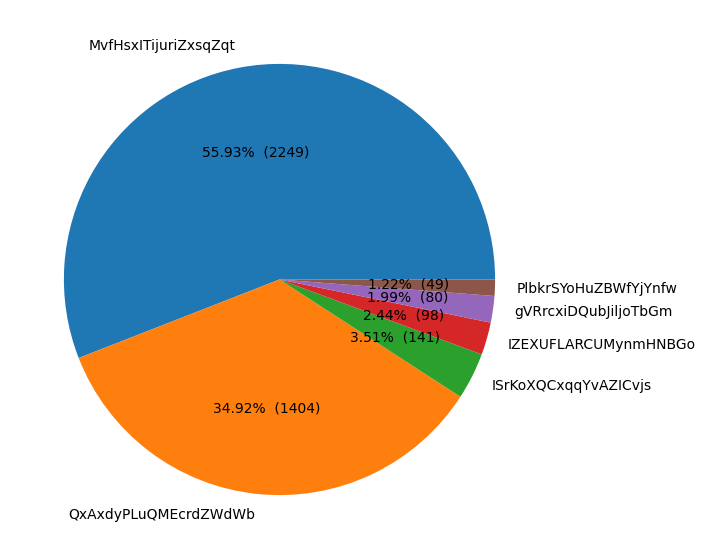

In [130]:
filter_list = [
    'QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs',
    'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm'
]

def make_autopct(values):
    def my_autopct(pct):
        total = sum(values)
        val = int(round(pct * total / 100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct, v=val)
    return my_autopct

stats = sessions_full.groupby('utm_source', as_index=False)['target'].sum()

stats = stats.sort_values('target', ascending=False)

stats1 = stats.iloc[:5]
print('1', stats1.head(10))

stats2 = stats[stats['utm_source'].isin(filter_list)]
print('2', stats2.head())

fig = plt.figure(figsize=(10, 7))
plt.pie(stats2['target'], labels=stats2['utm_source'], autopct=make_autopct(stats2['target']))
plt.show()


In [ ]:
# Не даю рекомендацию дать рекламу на
#('QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt', 'ISrKoXQCxqqYvAZICvjs',
#'IZEXUFLARCUMynmHNBGo', 'PlbkrSYoHuZBWfYjYnfw',
#'gVRrcxiDQubJiljoTbGm') 

 рекомендация для реклама  
               utm_source   target
153  ZpYIoDJMcFzVoPFsHGJL  15998.0
183  fDLlAcSmythWSCVMvqvL  10531.0
217  kjsLglQLzykiRbcDiGcD   6293.0
161  bByPQxmDaMXgpHeypKSM   5557.0
5    BHcvLfOaCWvWTykYqHVe   3882.0


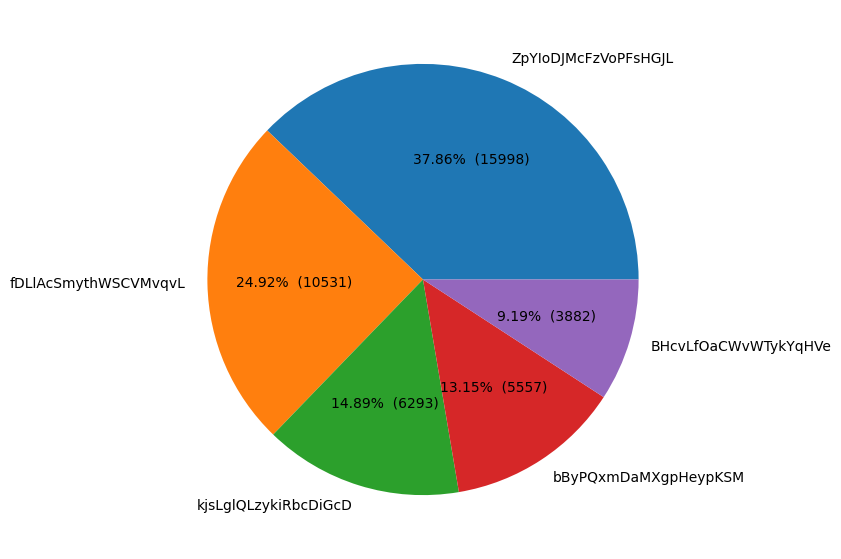

In [142]:
print(' рекомендация для реклама  ')
print(stats1.head())

fig = plt.figure(figsize=(10, 7))
plt.pie(stats1['target'], labels=stats1['utm_source'],autopct=make_autopct(stats1['target']));

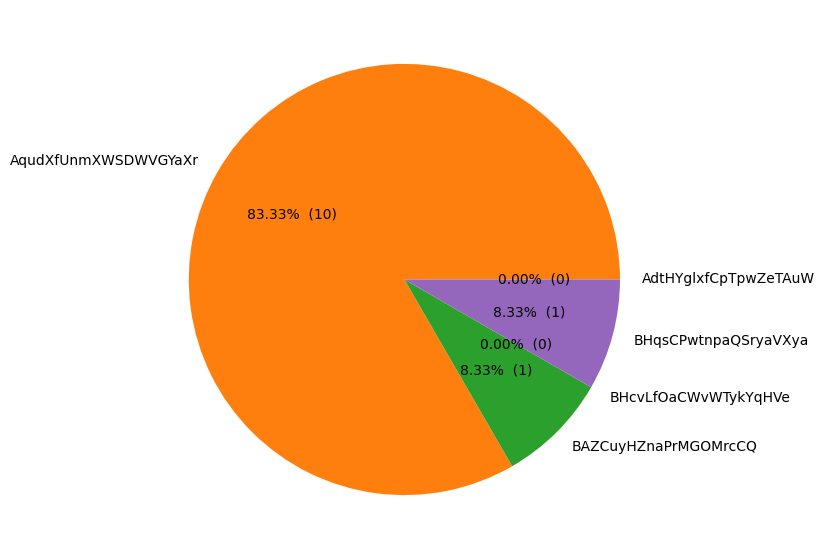

In [137]:
# utm_campaign
as_index=False
stats_k = sessions_full.groupby(['utm_campaign'], as_index=False)[['target']].sum()
stats_k=stats_k.iloc[0:5]

fig = plt.figure(figsize=(10, 7))
plt.pie(stats_k['target'], labels=stats_k['utm_campaign'],autopct=make_autopct(stats_k['target']));

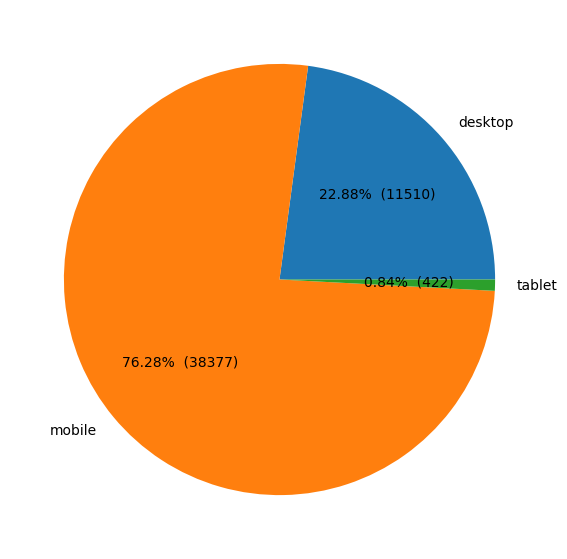

In [143]:
# device_category
as_index=False
stats_d = sessions_full.groupby(['device_category'], as_index=False)[['target']].sum()
stats_d=stats_d.iloc[0:5]

fig = plt.figure(figsize=(10, 7))
plt.pie(stats_d['target'], labels=stats_d['device_category'],autopct=make_autopct(stats_d['target']));

In [45]:
sessions_full.target.value_counts()

target
0.0    1809636
1.0      50309
Name: count, dtype: int64

In [46]:
sessions_full.target.value_counts()[1]/(sessions_full.target.value_counts()[0]+sessions_full.target.value_counts()[1])

0.02704864928801658

As we see the dataset is highly imbalanced with only 2.7% positive and 97.3% negative cases. So here I would like to use undersampling technique in order to make the training dataset more balanced. 

For this I take all the positive cases (target == 1) and select same number of negative cases from all the (target == 0) cases

In [47]:
balanced_df = pd.concat([sessions_full[sessions_full['target'] == 1], 
                      sessions_full[sessions_full['target'] == 0].sample(n=len(sessions_full[sessions_full['target'] == 1]), random_state=1)]).reset_index(drop=True)

In [48]:
balanced_df.shape

(100618, 14)

### Encoding Categorical data

In [49]:
ohe = OneHotEncoder(handle_unknown='infrequent_if_exist', sparse_output=False)

ohe.fit(balanced_df.drop(columns='target'))

OneHotEncoder(handle_unknown='infrequent_if_exist', sparse_output=False)

In [50]:
encoded_df = ohe.transform(balanced_df.drop(columns='target'))
encoded_df

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [51]:
encoded_df.shape

(100618, 3246)

In [52]:
clean_df = pd.concat([pd.DataFrame(encoded_df, columns=ohe.get_feature_names_out()), balanced_df['target']], axis=1)

In [53]:
clean_df.head()

,utm_source_AHgbtEjTEsiUMJouiDYS,utm_source_BHcvLfOaCWvWTykYqHVe,utm_source_BKeImrJuRDZcHiSSTdzm,utm_source_CFeqZLBNQdYHxJrTOHjY,utm_source_CgsxHpdTmXHvrHqEKRxp,utm_source_CqeIpFwJscTsZoYXdHsP,utm_source_DlnuGwaJBHGNEKdWfOpe,utm_source_DnEUulZAecfGPvdtZBYS,utm_source_DnxUhHWInKVDAWzwROOC,utm_source_EvhrtRzIJnQYHziPiLzV,...,geo_city_Zhigulevsk,geo_city_Zhongli District,geo_city_Zhukovskiy,geo_city_Zlatoust,geo_city_Zuhres,geo_city_Zurich,geo_city_Zvenigorod,geo_city_Тимофеевка,geo_city_Хомутово,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [54]:
clean_df['target'] = clean_df.target.astype(int)

## Modelling

In [55]:
# specify target variable
X = clean_df.drop(['target'], axis=1)
Y = clean_df['target']

In [56]:
# train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)

#### LogisticRegression

In [ ]:
# LogisticRegression
parameters_logreg = {
    'C': [0.1, 0.25, 0.5, 1, 2, 5],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}

logreg = LogisticRegression(class_weight='balanced', tol=1e-6, random_state=1)

clf_logreg = GridSearchCV(logreg, parameters_logreg, cv=4, scoring='roc_auc', verbose=3)
clf_logreg.fit(x_train, y_train)

Fitting 4 folds for each of 72 candidates, totalling 288 fits
[CV 1/4] END C=0.1, max_iter=100, penalty=l1, solver=liblinear;, score=0.680 total time=  23.2s


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/4] END C=0.1, max_iter=100, penalty=l1, solver=liblinear;, score=0.685 total time=  51.0s
[CV 3/4] END C=0.1, max_iter=100, penalty=l1, solver=liblinear;, score=0.684 total time=  14.9s
[CV 4/4] END C=0.1, max_iter=100, penalty=l1, solver=liblinear;, score=0.682 total time= 1.3min
[CV 1/4] END C=0.1, max_iter=100, penalty=l1, solver=saga;, score=0.680 total time= 4.6min
[CV 2/4] END C=0.1, max_iter=100, penalty=l1, solver=saga;, score=0.685 total time= 3.4min
[CV 3/4] END C=0.1, max_iter=100, penalty=l1, solver=saga;, score=0.684 total time= 5.5min
[CV 4/4] END C=0.1, max_iter=100, penalty=l1, solver=saga;, score=0.682 total time= 4.6min
[CV 1/4] END C=0.1, max_iter=100, penalty=l2, solver=liblinear;, score=0.684 total time=  12.3s
[CV 2/4] END C=0.1, max_iter=100, penalty=l2, solver=liblinear;, score=0.688 total time=   9.6s
[CV 3/4] END C=0.1, max_iter=100, penalty=l2, solver=liblinear;, score=0.687 total time=   9.0s
[CV 4/4] END C=0.1, max_iter=100, penalty=l2, solver=libline

C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/4] END C=0.25, max_iter=100, penalty=l1, solver=liblinear;, score=0.688 total time= 1.5min
[CV 3/4] END C=0.25, max_iter=100, penalty=l1, solver=liblinear;, score=0.687 total time=  29.3s


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/4] END C=0.25, max_iter=100, penalty=l1, solver=liblinear;, score=0.686 total time= 1.3min


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/4] END C=0.25, max_iter=100, penalty=l1, solver=saga;, score=0.683 total time= 7.7min


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/4] END C=0.25, max_iter=100, penalty=l1, solver=saga;, score=0.688 total time= 6.8min


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/4] END C=0.25, max_iter=100, penalty=l1, solver=saga;, score=0.687 total time= 6.8min
[CV 4/4] END C=0.25, max_iter=100, penalty=l1, solver=saga;, score=0.686 total time= 4.5min
[CV 1/4] END C=0.25, max_iter=100, penalty=l2, solver=liblinear;, score=0.684 total time=   9.7s
[CV 2/4] END C=0.25, max_iter=100, penalty=l2, solver=liblinear;, score=0.688 total time=   8.6s
[CV 3/4] END C=0.25, max_iter=100, penalty=l2, solver=liblinear;, score=0.688 total time=   8.9s
[CV 4/4] END C=0.25, max_iter=100, penalty=l2, solver=liblinear;, score=0.687 total time=   9.7s
[CV 1/4] END C=0.25, max_iter=100, penalty=l2, solver=saga;, score=0.684 total time= 2.6min
[CV 2/4] END C=0.25, max_iter=100, penalty=l2, solver=saga;, score=0.688 total time= 2.1min
[CV 3/4] END C=0.25, max_iter=100, penalty=l2, solver=saga;, score=0.688 total time= 2.6min
[CV 4/4] END C=0.25, max_iter=100, penalty=l2, solver=saga;, score=0.687 total time= 2.7min
[CV 1/4] END C=0.25, max_iter=200, penalty=l1, solver=liblin

C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/4] END C=0.5, max_iter=100, penalty=l1, solver=liblinear;, score=0.689 total time=  53.8s


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/4] END C=0.5, max_iter=100, penalty=l1, solver=liblinear;, score=0.687 total time= 1.0min


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/4] END C=0.5, max_iter=100, penalty=l1, solver=liblinear;, score=0.687 total time=  50.0s


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/4] END C=0.5, max_iter=100, penalty=l1, solver=saga;, score=0.684 total time= 6.8min


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/4] END C=0.5, max_iter=100, penalty=l1, solver=saga;, score=0.689 total time= 5.6min


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/4] END C=0.5, max_iter=100, penalty=l1, solver=saga;, score=0.687 total time= 6.8min


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/4] END C=0.5, max_iter=100, penalty=l1, solver=saga;, score=0.687 total time= 6.7min
[CV 1/4] END C=0.5, max_iter=100, penalty=l2, solver=liblinear;, score=0.683 total time=  10.6s
[CV 2/4] END C=0.5, max_iter=100, penalty=l2, solver=liblinear;, score=0.688 total time=  10.2s
[CV 3/4] END C=0.5, max_iter=100, penalty=l2, solver=liblinear;, score=0.687 total time=   9.6s
[CV 4/4] END C=0.5, max_iter=100, penalty=l2, solver=liblinear;, score=0.686 total time=   6.8s
[CV 1/4] END C=0.5, max_iter=100, penalty=l2, solver=saga;, score=0.683 total time= 4.7min
[CV 2/4] END C=0.5, max_iter=100, penalty=l2, solver=saga;, score=0.688 total time= 5.0min
[CV 3/4] END C=0.5, max_iter=100, penalty=l2, solver=saga;, score=0.687 total time= 5.0min
[CV 4/4] END C=0.5, max_iter=100, penalty=l2, solver=saga;, score=0.686 total time= 4.8min
[CV 1/4] END C=0.5, max_iter=200, penalty=l1, solver=liblinear;, score=0.684 total time=  32.2s
[CV 2/4] END C=0.5, max_iter=200, penalty=l1, solver=liblinear;, 

C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/4] END C=0.5, max_iter=200, penalty=l1, solver=saga;, score=0.684 total time=13.6min


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/4] END C=0.5, max_iter=200, penalty=l1, solver=saga;, score=0.689 total time=13.3min


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/4] END C=0.5, max_iter=200, penalty=l1, solver=saga;, score=0.687 total time=11.2min


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/4] END C=0.5, max_iter=200, penalty=l1, solver=saga;, score=0.687 total time=14.0min
[CV 1/4] END C=0.5, max_iter=200, penalty=l2, solver=liblinear;, score=0.683 total time=  16.4s
[CV 2/4] END C=0.5, max_iter=200, penalty=l2, solver=liblinear;, score=0.688 total time=  13.2s
[CV 3/4] END C=0.5, max_iter=200, penalty=l2, solver=liblinear;, score=0.687 total time=  13.2s
[CV 4/4] END C=0.5, max_iter=200, penalty=l2, solver=liblinear;, score=0.686 total time=  11.9s
[CV 1/4] END C=0.5, max_iter=200, penalty=l2, solver=saga;, score=0.683 total time= 4.5min
[CV 2/4] END C=0.5, max_iter=200, penalty=l2, solver=saga;, score=0.688 total time= 4.4min
[CV 3/4] END C=0.5, max_iter=200, penalty=l2, solver=saga;, score=0.687 total time= 5.0min
[CV 4/4] END C=0.5, max_iter=200, penalty=l2, solver=saga;, score=0.686 total time= 4.6min
[CV 1/4] END C=0.5, max_iter=500, penalty=l1, solver=liblinear;, score=0.684 total time=  36.8s
[CV 2/4] END C=0.5, max_iter=500, penalty=l1, solver=liblinear;, 

C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/4] END C=0.5, max_iter=500, penalty=l1, solver=saga;, score=0.687 total time=32.4min
[CV 1/4] END C=0.5, max_iter=500, penalty=l2, solver=liblinear;, score=0.683 total time=  14.3s
[CV 2/4] END C=0.5, max_iter=500, penalty=l2, solver=liblinear;, score=0.688 total time=  13.1s
[CV 3/4] END C=0.5, max_iter=500, penalty=l2, solver=liblinear;, score=0.687 total time=  11.8s
[CV 4/4] END C=0.5, max_iter=500, penalty=l2, solver=liblinear;, score=0.686 total time=  11.1s
[CV 1/4] END C=0.5, max_iter=500, penalty=l2, solver=saga;, score=0.683 total time= 4.1min
[CV 2/4] END C=0.5, max_iter=500, penalty=l2, solver=saga;, score=0.688 total time= 4.0min
[CV 3/4] END C=0.5, max_iter=500, penalty=l2, solver=saga;, score=0.687 total time= 4.6min
[CV 4/4] END C=0.5, max_iter=500, penalty=l2, solver=saga;, score=0.686 total time= 4.7min
[CV 1/4] END C=1, max_iter=100, penalty=l1, solver=liblinear;, score=0.683 total time=  50.5s
[CV 2/4] END C=1, max_iter=100, penalty=l1, solver=liblinear;, scor

C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/4] END C=1, max_iter=100, penalty=l1, solver=liblinear;, score=0.686 total time= 2.5min


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/4] END C=1, max_iter=100, penalty=l1, solver=liblinear;, score=0.687 total time= 1.3min


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/4] END C=1, max_iter=100, penalty=l1, solver=saga;, score=0.683 total time= 6.9min


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/4] END C=1, max_iter=100, penalty=l1, solver=saga;, score=0.688 total time= 7.0min


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/4] END C=1, max_iter=100, penalty=l1, solver=saga;, score=0.687 total time= 7.1min


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/4] END C=1, max_iter=100, penalty=l1, solver=saga;, score=0.687 total time= 7.1min
[CV 1/4] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=0.682 total time=  11.7s
[CV 2/4] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=0.686 total time=  10.0s
[CV 3/4] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=0.686 total time=  11.1s
[CV 4/4] END C=1, max_iter=100, penalty=l2, solver=liblinear;, score=0.685 total time=  10.1s


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/4] END C=1, max_iter=100, penalty=l2, solver=saga;, score=0.682 total time= 5.2min


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/4] END C=1, max_iter=100, penalty=l2, solver=saga;, score=0.686 total time= 4.7min


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/4] END C=1, max_iter=100, penalty=l2, solver=saga;, score=0.686 total time= 5.4min


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/4] END C=1, max_iter=100, penalty=l2, solver=saga;, score=0.685 total time= 5.5min
[CV 1/4] END C=1, max_iter=200, penalty=l1, solver=liblinear;, score=0.683 total time=  55.0s
[CV 2/4] END C=1, max_iter=200, penalty=l1, solver=liblinear;, score=0.688 total time= 1.4min
[CV 3/4] END C=1, max_iter=200, penalty=l1, solver=liblinear;, score=0.686 total time= 3.0min
[CV 4/4] END C=1, max_iter=200, penalty=l1, solver=liblinear;, score=0.687 total time= 1.9min


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/4] END C=1, max_iter=200, penalty=l1, solver=saga;, score=0.683 total time=14.1min


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/4] END C=1, max_iter=200, penalty=l1, solver=saga;, score=0.688 total time=14.0min


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/4] END C=1, max_iter=200, penalty=l1, solver=saga;, score=0.687 total time=11.6min


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/4] END C=1, max_iter=200, penalty=l1, solver=saga;, score=0.687 total time=13.6min
[CV 1/4] END C=1, max_iter=200, penalty=l2, solver=liblinear;, score=0.682 total time=  13.4s
[CV 2/4] END C=1, max_iter=200, penalty=l2, solver=liblinear;, score=0.686 total time=  10.6s
[CV 3/4] END C=1, max_iter=200, penalty=l2, solver=liblinear;, score=0.686 total time=  10.3s
[CV 4/4] END C=1, max_iter=200, penalty=l2, solver=liblinear;, score=0.685 total time=  10.0s
[CV 1/4] END C=1, max_iter=200, penalty=l2, solver=saga;, score=0.682 total time= 7.2min
[CV 2/4] END C=1, max_iter=200, penalty=l2, solver=saga;, score=0.686 total time= 7.3min
[CV 3/4] END C=1, max_iter=200, penalty=l2, solver=saga;, score=0.686 total time= 7.3min
[CV 4/4] END C=1, max_iter=200, penalty=l2, solver=saga;, score=0.685 total time= 7.1min
[CV 1/4] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.683 total time=  51.8s
[CV 2/4] END C=1, max_iter=500, penalty=l1, solver=liblinear;, score=0.688 total time

C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/4] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.687 total time=27.2min


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/4] END C=1, max_iter=500, penalty=l1, solver=saga;, score=0.687 total time=33.5min
[CV 1/4] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.682 total time=  14.8s
[CV 2/4] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.686 total time=  12.1s
[CV 3/4] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.686 total time=  12.0s
[CV 4/4] END C=1, max_iter=500, penalty=l2, solver=liblinear;, score=0.685 total time=   9.9s
[CV 1/4] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.682 total time= 6.1min
[CV 2/4] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.686 total time= 5.7min
[CV 3/4] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.686 total time= 7.0min
[CV 4/4] END C=1, max_iter=500, penalty=l2, solver=saga;, score=0.685 total time= 6.9min
[CV 1/4] END C=2, max_iter=100, penalty=l1, solver=liblinear;, score=0.681 total time= 1.6min


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 2/4] END C=2, max_iter=100, penalty=l1, solver=liblinear;, score=0.686 total time= 1.6min


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 3/4] END C=2, max_iter=100, penalty=l1, solver=liblinear;, score=0.685 total time= 3.1min


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


[CV 4/4] END C=2, max_iter=100, penalty=l1, solver=liblinear;, score=0.684 total time= 2.8min


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/4] END C=2, max_iter=100, penalty=l1, solver=saga;, score=0.681 total time= 6.1min


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/4] END C=2, max_iter=100, penalty=l1, solver=saga;, score=0.686 total time= 7.3min


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/4] END C=2, max_iter=100, penalty=l1, solver=saga;, score=0.685 total time= 7.4min


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/4] END C=2, max_iter=100, penalty=l1, solver=saga;, score=0.684 total time= 7.4min
[CV 1/4] END C=2, max_iter=100, penalty=l2, solver=liblinear;, score=0.680 total time=  11.1s
[CV 2/4] END C=2, max_iter=100, penalty=l2, solver=liblinear;, score=0.685 total time=  11.2s
[CV 3/4] END C=2, max_iter=100, penalty=l2, solver=liblinear;, score=0.685 total time=   9.2s
[CV 4/4] END C=2, max_iter=100, penalty=l2, solver=liblinear;, score=0.683 total time=  10.5s


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/4] END C=2, max_iter=100, penalty=l2, solver=saga;, score=0.680 total time= 5.1min


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 2/4] END C=2, max_iter=100, penalty=l2, solver=saga;, score=0.685 total time= 4.4min


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 3/4] END C=2, max_iter=100, penalty=l2, solver=saga;, score=0.685 total time= 5.1min


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 4/4] END C=2, max_iter=100, penalty=l2, solver=saga;, score=0.683 total time= 5.3min
[CV 1/4] END C=2, max_iter=200, penalty=l1, solver=liblinear;, score=0.681 total time= 1.8min
[CV 2/4] END C=2, max_iter=200, penalty=l1, solver=liblinear;, score=0.686 total time= 2.0min
[CV 3/4] END C=2, max_iter=200, penalty=l1, solver=liblinear;, score=0.685 total time= 6.1min
[CV 4/4] END C=2, max_iter=200, penalty=l1, solver=liblinear;, score=0.684 total time= 2.8min


C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


[CV 1/4] END C=2, max_iter=200, penalty=l1, solver=saga;, score=0.681 total time=12.7min


 I interrupted the kernel after about 16 hours! Because it was physically too much for my computer 
 to run 16 hours non stop. In this time it completed 54/72 candidates fitting 4 fold for each candidate.
 So I can choose the best one among these executed 54 candidates for Logistic Regression.

In [184]:
# The best result of GridSearchCV is score=0.689 at hyperparameters:
# C=0.5, max_iter=100, penalty=l1, solver=liblinear;

In [186]:
best_logreg = LogisticRegression(
    C=0.5,
    max_iter=100,
    penalty='l1',
    solver='liblinear',
    class_weight='balanced',
    tol=1e-6,
    random_state=1
)

best_logreg.fit(x_train, y_train)

C:\Users\quran\miniconda3\envs\myenv\lib\site-packages\sklearn\svm\_base.py:1250: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(C=0.5, class_weight='balanced', penalty='l1', random_state=1,
                   solver='liblinear', tol=1e-06)

In [187]:
preds = best_logreg.predict(x_test)
accuracy_score(y_test, preds)
print(f'Accuracy: {accuracy_score(y_test, preds):.5f}')

Accuracy: 0.63740


#### RandomForestClassifier

In [59]:
# RandomForestClassifier
parameters_rf = {
    'n_estimators': [100, 200, 500],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'max_depth': [10, 50, 100, None]
}

rf = RandomForestClassifier(random_state=1)

# Used RandomizedSearchCV with 15 iterations
clf_rf = RandomizedSearchCV(rf, parameters_rf, cv=4, scoring='roc_auc', verbose=100, n_jobs=5, n_iter=40, random_state=12)
clf_rf.fit(x_train, y_train)

Fitting 4 folds for each of 40 candidates, totalling 160 fits


RandomizedSearchCV(cv=4, estimator=RandomForestClassifier(random_state=1),
                   n_iter=40, n_jobs=5,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 50, 100, None],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 500]},
                   random_state=12, scoring='roc_auc', verbose=100)

In [60]:
clf_rf.best_params_

{'n_estimators': 200,
 'min_samples_split': 2,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 100,
 'bootstrap': False}

In [61]:
clf_rf.best_score_

0.6914793717758618

In [62]:
clf_rf.best_estimator_.fit(x_train, y_train)

RandomForestClassifier(bootstrap=False, max_depth=100, min_samples_leaf=2,
                       n_estimators=200, random_state=1)

In [63]:
preds = clf_rf.predict(x_test)
accuracy_score(y_test, preds)
print(f'Accuracy: {accuracy_score(y_test, preds):.5f}')

Accuracy: 0.64247


#### MLPClassifier

In [66]:
# MultiLayer Perceptron
parameters_mlp = {
    'hidden_layer_sizes': [(50,), (50, 50)],
    'activation': ['tanh'],
    'solver': ['adam'],
    'alpha': [0.0001],
    'learning_rate': ['constant']
}

mlp = MLPClassifier(max_iter=1000, tol=1e-3, random_state=1)

clf_mlp = GridSearchCV(mlp, parameters_mlp, cv=4, scoring='roc_auc', verbose=100, n_jobs = 5)
clf_mlp.fit(x_train, y_train)


Fitting 4 folds for each of 1 candidates, totalling 4 fits


GridSearchCV(cv=4,
             estimator=MLPClassifier(max_iter=1000, random_state=1, tol=0.001),
             n_jobs=5,
             param_grid={'activation': ['tanh'], 'alpha': [0.0001],
                         'hidden_layer_sizes': [(50, 50)],
                         'learning_rate': ['constant'], 'solver': ['adam']},
             scoring='roc_auc', verbose=100)

In [ ]:
# I reduced the number of cmbinations because only 1 candidate took more than 2 hours to run

In [67]:
clf_mlp.best_params_

{'activation': 'tanh',
 'alpha': 0.0001,
 'hidden_layer_sizes': (50, 50),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [68]:
clf_mlp.best_score_

0.6343212252488114

In [69]:
clf_mlp.best_estimator_.fit(x_train, y_train)

MLPClassifier(activation='tanh', hidden_layer_sizes=(50, 50), max_iter=1000,
              random_state=1, tol=0.001)

In [70]:
preds = clf_mlp.predict(x_test)
accuracy_score(y_test, preds)
print(f'Точность: {accuracy_score(y_test, preds):.5f}')

Точность: 0.60967


## Conclusion

So among 3 models RandomForestClassifier outperformed other two both in train and testing data

In [71]:
clf_rf.best_estimator_.fit(X, Y)

RandomForestClassifier(bootstrap=False, max_depth=100, min_samples_leaf=2,
                       n_estimators=200, random_state=1)

### Saving the best model into pickle file

In [72]:
model = clf_rf
path = 'data/model.pkl'


joblib.dump({
        'model': model.best_estimator_,
        'metadata': {
            'name': 'Sber RentAvto',
            'author': 'Quranboyev Behruz',
            'version': 1,
            'date': datetime.now(),
            'type': type(model.best_estimator_).__name__,
            'auc': model.best_score_
        }
    }, path)

['data/model.pkl']

### Importances of features

In [73]:
f_imp_list = sorted(zip(x_train.columns, clf_rf.best_estimator_.feature_importances_), key=lambda x: x[1], reverse=True)

for feature, importance in f_imp_list[:5]:
    print(f"Feature: {feature}, Importance: {importance:.6f}")

Feature: utm_campaign_FTjNLDyTrXaWYgZymFkV, Importance: 0.045116
Feature: utm_adcontent_JNHcPlZPxEMWDnRiyoBf, Importance: 0.039793
Feature: utm_campaign_LTuZkdKfxRGVceoWkVyg, Importance: 0.037117
Feature: utm_medium_cpm, Importance: 0.036437
Feature: utm_medium_referral, Importance: 0.031833


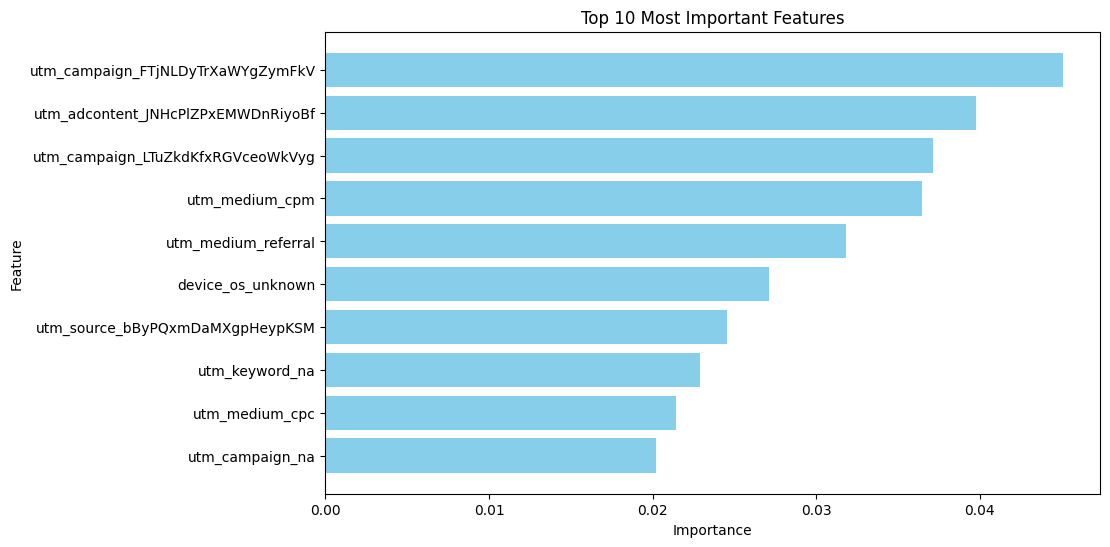

In [74]:
top_features = f_imp_list[:10]

names, importances = zip(*top_features)

plt.figure(figsize=(10, 6))
plt.barh(names, importances, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features')
plt.gca().invert_yaxis()
plt.show()